In [1]:
#import required libraries


# Pandas 
import pandas as pd
from pandas import Series,DataFrame 

# Numpy and Matplotlib
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
#sns.set_style('whitegrid')
# Machine Learning 
from sklearn import preprocessing

# In a notebook environment, display the plots inline
%matplotlib inline

# Set some parameters to apply to all plots. These can be overridden
# in each plot if desired
import matplotlib
# Plot size to 14" x 7"
matplotlib.rc('figure', figsize = (14, 7))
# Font size to 14
matplotlib.rc('font', size = 14)
# Do not display top and right frame lines
matplotlib.rc('axes.spines', top = False, right = False)
# Remove grid lines
matplotlib.rc('axes', grid = False)
# Set backgound color to white
matplotlib.rc('axes', facecolor = 'white')

%matplotlib inline
# import required libraries
import random
import datetime 
import numpy as np
import pandas as pd
from random import randrange

import matplotlib.pyplot as plt

import seaborn as sns

sns.set_style('whitegrid')
sns.set_context('talk')

params = {'legend.fontsize': 'small',
          'figure.figsize': (10, 5),
         'axes.labelsize': 'medium',
         'axes.titlesize':'medium',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}

plt.rcParams.update(params)

from IPython.display import display, HTML

import random
import datetime 
import numpy as np
import pandas as pd
from random import randrange
from sklearn import preprocessing
from sklearn.feature_selection import RFE, f_regression
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, RandomizedLasso)
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

pd.options.mode.chained_assignment = None

In [2]:
#Read files:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train['source']='train'
test['source']='test'
data = pd.concat([train, test],ignore_index=True)
print(train.shape, test.shape, data.shape)
data.to_csv("data_before.csv",index=False)
print(data.source.value_counts())

(79853, 14) (34224, 13) (114077, 14)
train    79853
test     34224
Name: source, dtype: int64


In [4]:
train.columns = [x.lower() for x in train.columns]
train.columns
train.head(5)

,id,perc_premium_paid_by_cash_credit,age_in_days,income,count_3-6_months_late,count_6-12_months_late,count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,renewal,source
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,3300,1,train
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,18000,1,train
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,3300,0,train
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,9600,1,train
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,9600,1,train


In [5]:
print("Explanatory variables:  {}".format(len(train.columns)-1))
print("Number of Observations: {}".format(train.shape[0]))

train['target'] = train['renewal'].astype('category')

# create a 'target' column for our own convenience
print("Target variable:       '{}' -> '{}'".format('renewal', 'target'))


Explanatory variables:  13
Number of Observations: 79853
Target variable:       'renewal' -> 'target'


# Descriptive Analyis

In [6]:

# regex
import re


#Premium Payment Delays
#Let's start by looking at the past payment delays

pattern = re.compile("^count")

pay_status_columns = [ x for x in train.columns if (pattern.match(x))]

train[pay_status_columns].head(10)

,count_3-6_months_late,count_6-12_months_late,count_more_than_12_months_late
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,2.0,3.0,1.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
5,2.0,0.0,0.0
6,0.0,0.0,0.0
7,1.0,6.0,4.0
8,0.0,0.0,0.0
9,2.0,0.0,0.0


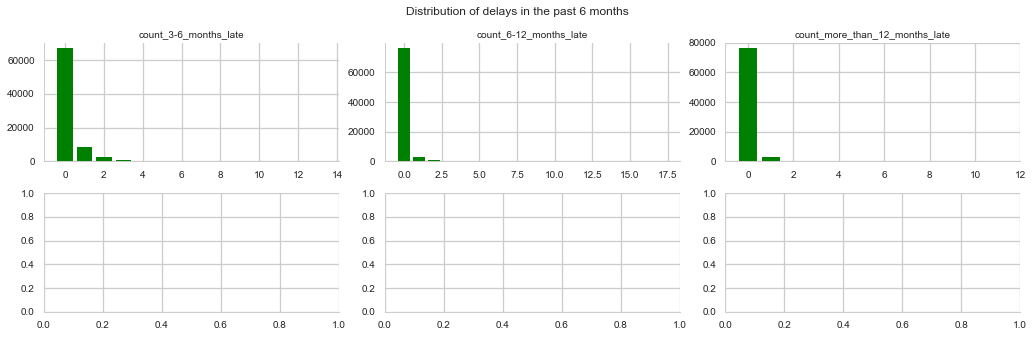

In [7]:
# pay status columns
pattern = re.compile("^count")
pay_status_columns = [ x for x in train.columns if (pattern.match(x))]

fig, ax = plt.subplots(2,3)
fig.set_size_inches(15,5)
fig.suptitle('Distribution of delays in the past 6 months')

for i in range(len(pay_status_columns)):
    row,col = int(i/3), i%3

    d  = train[pay_status_columns[i]].value_counts()
    ax[row,col].bar(d.index, d, align='center', color='g')
    ax[row,col].set_title(pay_status_columns[i])

plt.tight_layout(pad=3.0, w_pad=0.5, h_pad=1.0)
plt.show()

In [8]:
# There are customers who have delayed payments. One thing worth of notice is that the textual information provided about this variables and the actual values are not extactly the same. So its a best practice to review and explore the data, before proceeding with any analysis, explore and verify the actual data and the textual info about the data itself.

In [9]:
train.describe()

,id,perc_premium_paid_by_cash_credit,age_in_days,income,count_3-6_months_late,count_6-12_months_late,count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,premium,renewal
count,79853.000000,79853.000000,79853.000000,7.985300e+04,79756.000000,79756.000000,79756.000000,76879.000000,79853.000000,79853.000000,79853.000000
mean,57167.166368,0.314288,18846.696906,2.088472e+05,0.248671,0.078188,0.060008,99.067291,10.863887,10924.507533,0.937410
std,32928.970160,0.334915,5208.719136,4.965826e+05,0.691468,0.436507,0.312023,0.739799,5.170687,9401.676542,0.242226
min,2.000000,0.000000,7670.000000,2.403000e+04,0.000000,0.000000,0.000000,91.900000,2.000000,1200.000000,0.000000
25%,28640.000000,0.034000,14974.000000,1.080100e+05,0.000000,0.000000,0.000000,98.810000,7.000000,5400.000000,1.000000
50%,57262.000000,0.167000,18625.000000,1.665600e+05,0.000000,0.000000,0.000000,99.210000,10.000000,7500.000000,1.000000
75%,85632.000000,0.538000,22636.000000,2.520900e+05,0.000000,0.000000,0.000000,99.540000,14.000000,13800.000000,1.000000
max,114076.000000,1.000000,37602.000000,9.026260e+07,13.000000,17.000000,11.000000,99.890000,60.000000,60000.000000,1.000000


renewed accounts are 93.74099908582019% out of 79853 observations


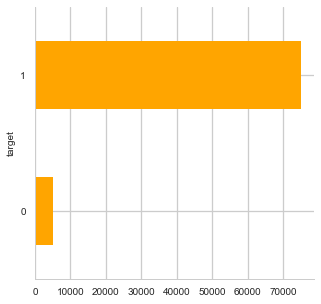

In [10]:
#Explore Defaulting - or propensity to not renew
fig = plt.figure()
fig.set_size_inches(5,5)
d = train.groupby(['target']).size()

print("renewed accounts are {}% out of {} observations".format(100* d[1]/(d[1]+d[0]), d[1]+d[0]))
p = d.plot(kind='barh', color='orange')


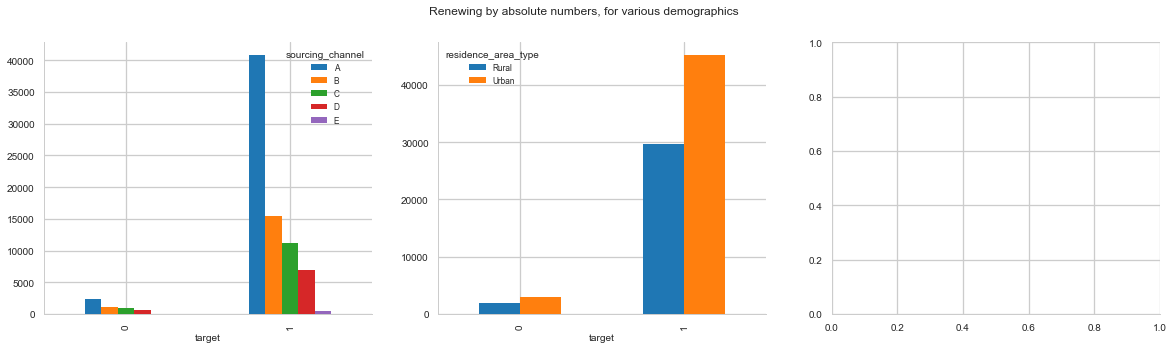

In [11]:
#Explore some statistics of defaulting using the categorical variables

#Absolute statistics

fig, ax = plt.subplots(1,3)
fig.set_size_inches(20,5)
fig.suptitle('Renewing by absolute numbers, for various demographics')

d = train.groupby(['target', 'sourcing_channel']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[0])

d = train.groupby(['target', 'residence_area_type']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[1])



In [12]:
#Renewal through Channel A is the highest followed by B, C and D
#Renewal by customers in Urban area is higher than Rural

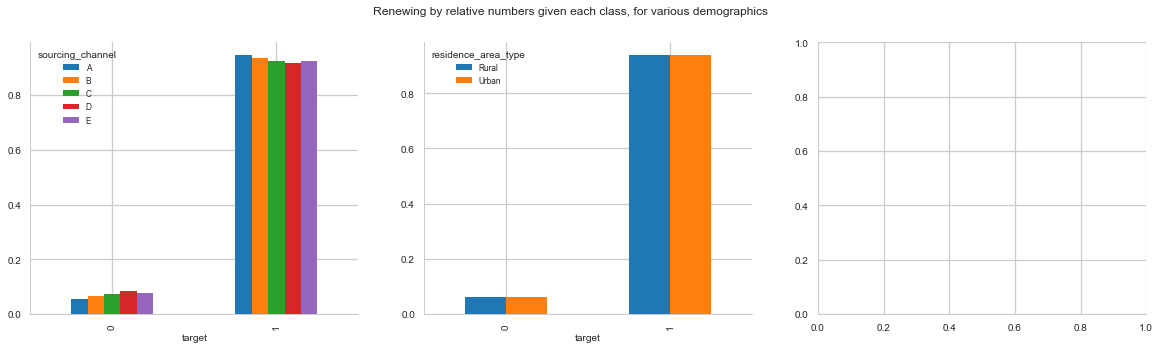

In [13]:
#Statistics relative to the population

fig, ax = plt.subplots(1,3)
fig.set_size_inches(20,5)
fig.suptitle('Renewing by relative numbers given each class, for various demographics')

d = train.groupby(['target', 'sourcing_channel']).size().unstack(level=1)
d = d / d.sum()
p = d.plot(kind='bar', ax=ax[0])

d = train.groupby(['target', 'residence_area_type']).size().unstack(level=1)
d = d / d.sum()
p = d.plot(kind='bar', ax=ax[1])


In [14]:
def describe_dataframe(df=pd.DataFrame()):
    """This function generates descriptive stats of a dataframe
    Args:
        df (dataframe): the dataframe to be analyzed
    Returns:
        None

    """
    print("\n\n")
    print("*"*30)
    print("About the Data")
    print("*"*30)
    
    print("Number of rows::",df.shape[0])
    print("Number of columns::",df.shape[1])
    print("\n")
    
    print("Column Names::",df.columns.values.tolist())
    print("\n")
    
    print("Column Data Types::\n",df.dtypes)
    print("\n")
    
    print("Columns with Missing Values::",df.columns[df.isnull().any()].tolist())
    print("\n")
    
    print("Number of rows with Missing Values::",len(pd.isnull(df).any(1).nonzero()[0].tolist()))
    print("\n")
    
    print("Sample Indices with missing data::",pd.isnull(df).any(1).nonzero()[0].tolist()[0:5])
    print("\n")
    
    print("General Stats::")
    print(df.info())
    print("\n")
    
    print("Summary Stats::")
    print(df.describe())
    print("\n")
    
    print("Dataframe Sample Rows::")
    display(df.head(5))
    
def cleanup_column_names(df,rename_dict={},do_inplace=True):
    """This function renames columns of a pandas dataframe
       It converts column names to snake case if rename_dict is not passed. 
    Args:
        rename_dict (dict): keys represent old column names and values point to 
                            newer ones
        do_inplace (bool): flag to update existing dataframe or return a new one
    Returns:
        pandas dataframe if do_inplace is set to False, None otherwise

    """
    if not rename_dict:
        return df.rename(columns={col: col.lower().replace(' ','_') 
                    for col in df.columns.values.tolist()}, 
                  inplace=do_inplace)
    else:
        return df.rename(columns=rename_dict,inplace=do_inplace)

In [15]:
display(train.head())

,id,perc_premium_paid_by_cash_credit,age_in_days,income,count_3-6_months_late,count_6-12_months_late,count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,renewal,source,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,3300,1,train,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,18000,1,train,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,3300,0,train,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,9600,1,train,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,9600,1,train,1


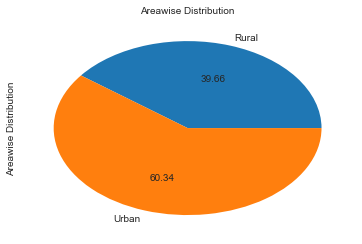

In [16]:
class_series = train.groupby('residence_area_type').size()
class_series.name = 'Areawise Distribution'
class_series.plot.pie(autopct='%.2f')
plt.title('Areawise Distribution')
plt.show()

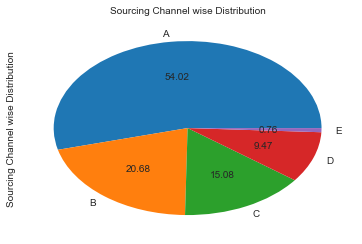

In [17]:
# We have more Urban Population than Rural 60:40 ratio

class_series = train.groupby('sourcing_channel').size()
class_series.name = 'Sourcing Channel wise Distribution'
class_series.plot.pie(autopct='%.2f')
plt.title('Sourcing Channel wise Distribution')
plt.show()

In [18]:
#Channel A seems to be the most preferred channel, followed by B and C

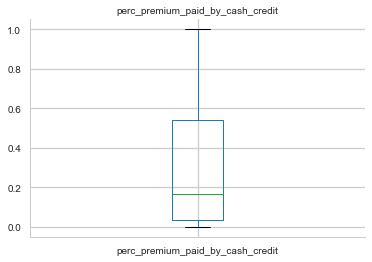

In [19]:
train[['perc_premium_paid_by_cash_credit']].plot.box()
plt.title('perc_premium_paid_by_cash_credit')
plt.show()

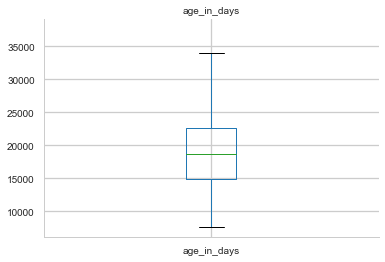

In [20]:
#id	perc_premium_paid_by_cash_credit	age_in_days	income	count_3-6_months_late	count_6-12_months_late	count_more_than_12_months_late	application_underwriting_score	no_of_premiums_paid	sourcing_channel	residence_area_type	premium	renewal	source	target

train[['age_in_days']].plot.box()
plt.title('age_in_days')
plt.show()

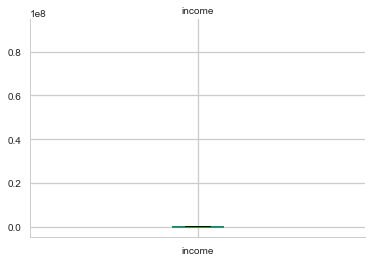

In [21]:
train[['income']].plot.box()
plt.title('income')
plt.show()

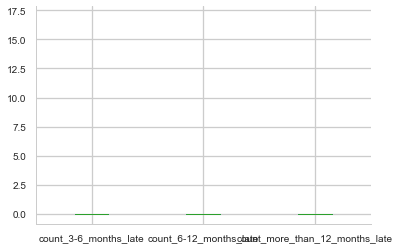

In [22]:
#id	perc_premium_paid_by_cash_credit	age_in_days	income	count_3-6_months_late	count_6-12_months_late	count_more_than_12_months_late	application_underwriting_score	no_of_premiums_paid	sourcing_channel	residence_area_type	premium	renewal	source	target

train[['count_3-6_months_late','count_6-12_months_late','count_more_than_12_months_late']].plot.box()
#plt.title('Late Payments')
#plt.ylim(0, 1)
plt.show()



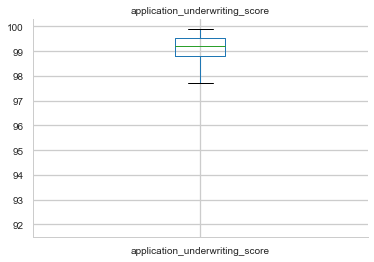

In [23]:

train[['application_underwriting_score']].plot.box()
plt.title('application_underwriting_score')
plt.show()

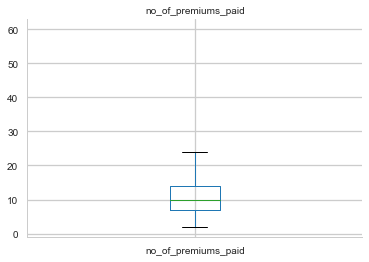

In [24]:
train[['no_of_premiums_paid']].plot.box()
plt.title('no_of_premiums_paid')
plt.show()

In [25]:
describe_dataframe(data)




******************************
About the Data
******************************
Number of rows:: 114077
Number of columns:: 14


Column Names:: ['Count_3-6_months_late', 'Count_6-12_months_late', 'Count_more_than_12_months_late', 'Income', 'age_in_days', 'application_underwriting_score', 'id', 'no_of_premiums_paid', 'perc_premium_paid_by_cash_credit', 'premium', 'renewal', 'residence_area_type', 'source', 'sourcing_channel']


Column Data Types::
 Count_3-6_months_late               float64
Count_6-12_months_late              float64
Count_more_than_12_months_late      float64
Income                                int64
age_in_days                           int64
application_underwriting_score      float64
id                                    int64
no_of_premiums_paid                   int64
perc_premium_paid_by_cash_credit    float64
premium                               int64
renewal                             float64
residence_area_type                  object
source              

,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,Income,age_in_days,application_underwriting_score,id,no_of_premiums_paid,perc_premium_paid_by_cash_credit,premium,renewal,residence_area_type,source,sourcing_channel
0,0.0,0.0,0.0,355060,12058,99.02,110936,13,0.429,3300,1.0,Urban,train,C
1,0.0,0.0,0.0,315150,21546,99.89,41492,21,0.010,18000,1.0,Urban,train,A
2,2.0,3.0,1.0,84140,17531,98.69,31300,7,0.917,3300,0.0,Rural,train,C
3,0.0,0.0,0.0,250510,15341,99.57,19415,9,0.049,9600,1.0,Urban,train,A
4,0.0,0.0,0.0,198680,31400,99.87,99379,12,0.052,9600,1.0,Urban,train,B


In [26]:
#Rename Columns
print("Dataframe columns:\n{}".format(data.columns.tolist()))

Dataframe columns:
['Count_3-6_months_late', 'Count_6-12_months_late', 'Count_more_than_12_months_late', 'Income', 'age_in_days', 'application_underwriting_score', 'id', 'no_of_premiums_paid', 'perc_premium_paid_by_cash_credit', 'premium', 'renewal', 'residence_area_type', 'source', 'sourcing_channel']


In [27]:
cleanup_column_names(data)

In [28]:
print("Dataframe columns:\n{}".format(data.columns.tolist()))

Dataframe columns:
['count_3-6_months_late', 'count_6-12_months_late', 'count_more_than_12_months_late', 'income', 'age_in_days', 'application_underwriting_score', 'id', 'no_of_premiums_paid', 'perc_premium_paid_by_cash_credit', 'premium', 'renewal', 'residence_area_type', 'source', 'sourcing_channel']


In [29]:
# #Sort Rows on defined attributes
# display(data.sort_values(['age_in_days', 'Income'], 
#                          ascending=[True, False]).head())

In [30]:

#Rearrange Columns in a Dataframe
display(data[['id','age_in_days','income',
              'residence_area_type', 'application_underwriting_score','premium','no_of_premiums_paid',
           'count_3-6_months_late', 'count_6-12_months_late', 'count_more_than_12_months_late','sourcing_channel','perc_premium_paid_by_cash_credit', 'source','renewal']].head())

,id,age_in_days,income,residence_area_type,application_underwriting_score,premium,no_of_premiums_paid,count_3-6_months_late,count_6-12_months_late,count_more_than_12_months_late,sourcing_channel,perc_premium_paid_by_cash_credit,source,renewal
0,110936,12058,355060,Urban,99.02,3300,13,0.0,0.0,0.0,C,0.429,train,1.0
1,41492,21546,315150,Urban,99.89,18000,21,0.0,0.0,0.0,A,0.010,train,1.0
2,31300,17531,84140,Rural,98.69,3300,7,2.0,3.0,1.0,C,0.917,train,0.0
3,19415,15341,250510,Urban,99.57,9600,9,0.0,0.0,0.0,A,0.049,train,1.0
4,99379,31400,198680,Urban,99.87,9600,12,0.0,0.0,0.0,B,0.052,train,1.0


In [31]:
#Apply: Using apply to get attribute ranges

display(data.select_dtypes(include=[np.number]).apply(lambda x: 
                                                        x.max()- x.min()))

count_3-6_months_late                     13.00
count_6-12_months_late                    17.00
count_more_than_12_months_late            11.00
income                              90238570.00
age_in_days                            29932.00
application_underwriting_score             7.99
id                                    114076.00
no_of_premiums_paid                       58.00
perc_premium_paid_by_cash_credit           1.00
premium                                58800.00
renewal                                    1.00
dtype: float64

In [32]:
#Missing Values
#Columns with Missing Values:: ['Count_3-6_months_late', 'Count_6-12_months_late', 'Count_more_than_12_months_late', 'application_underwriting_score', 'renewal']

data['count_3-6_months_late'].value_counts()


0.0     95629
1.0     12560
2.0      3513
3.0      1302
4.0       534
5.0       237
6.0       100
7.0        38
8.0        21
9.0         9
12.0        2
10.0        2
11.0        1
13.0        1
Name: count_3-6_months_late, dtype: int64

In [33]:
data['count_3-6_months_late'].fillna(value=0.0,
                                inplace=True)
data['count_3-6_months_late'].isnull().any()


False

In [34]:
data['count_6-12_months_late'].value_counts()

0.0     108352
1.0       3796
2.0       1005
3.0        436
4.0        186
5.0         74
6.0         44
7.0         18
9.0         12
8.0         10
10.0         7
14.0         2
11.0         2
13.0         2
12.0         1
17.0         1
15.0         1
Name: count_6-12_months_late, dtype: int64

In [35]:
data['count_6-12_months_late'].fillna(value=0.0,
                                inplace=True)
data['count_6-12_months_late'].isnull().any()


False

In [36]:
#'Count_more_than_12_months_late', 'application_underwriting_score', 'renewal']

data['count_more_than_12_months_late'].value_counts()

0.0     108687
1.0       4237
2.0        718
3.0        203
4.0         62
5.0         22
6.0         13
7.0          4
8.0          2
11.0         1
Name: count_more_than_12_months_late, dtype: int64

In [37]:
data['count_more_than_12_months_late'].fillna(value=0.0,
                                inplace=True)
data['count_more_than_12_months_late'].isnull().any()


False

In [38]:
data['application_underwriting_score'].value_counts()

99.89    2835
99.88    1940
99.87    1237
99.86     967
99.30     904
99.32     900
99.38     898
99.23     895
99.28     890
99.18     880
99.46     878
99.42     876
99.37     874
99.31     873
99.36     871
99.35     867
99.25     862
99.27     858
99.43     858
99.33     853
99.29     849
99.39     843
99.22     838
99.17     837
99.48     828
99.16     828
99.19     827
99.52     826
99.26     825
99.40     825
         ... 
93.04       1
94.26       1
92.55       1
94.25       1
94.65       1
93.43       1
92.56       1
92.12       1
93.59       1
93.13       1
92.20       1
92.37       1
93.18       1
94.79       1
92.47       1
92.07       1
95.45       1
94.96       1
92.78       1
93.14       1
93.91       1
92.26       1
92.24       1
95.81       1
93.29       1
93.21       1
92.97       1
92.42       1
92.63       1
92.74       1
Name: application_underwriting_score, Length: 713, dtype: int64

In [39]:
data['application_underwriting_score'].fillna(value=np.round(data.application_underwriting_score.mean(),decimals=2),
                                inplace=True)
data['application_underwriting_score'].isnull().any()

False

In [40]:
data.isnull().any()

count_3-6_months_late               False
count_6-12_months_late              False
count_more_than_12_months_late      False
income                              False
age_in_days                         False
application_underwriting_score      False
id                                  False
no_of_premiums_paid                 False
perc_premium_paid_by_cash_credit    False
premium                             False
renewal                              True
residence_area_type                 False
source                              False
sourcing_channel                    False
dtype: bool

In [41]:
#Duplicates

# sample duplicates
display(data[data.duplicated(subset=['id'])].head())
print("Shape of data={}".format(data.shape))

,count_3-6_months_late,count_6-12_months_late,count_more_than_12_months_late,income,age_in_days,application_underwriting_score,id,no_of_premiums_paid,perc_premium_paid_by_cash_credit,premium,renewal,residence_area_type,source,sourcing_channel


Shape of data=(114077, 14)


In [42]:
#No duplicates

In [43]:
#Encode Categoricals

#One Hot Encoding using get_dummies()

#display(data = pd.get_dummies(data,columns=['sourcing_channel','residence_area_type']).head())

In [44]:
#Random Sampling data from DataFrame
display(data.sample(frac=0.2, replace=True, random_state=42).head())

,count_3-6_months_late,count_6-12_months_late,count_more_than_12_months_late,income,age_in_days,application_underwriting_score,id,no_of_premiums_paid,perc_premium_paid_by_cash_credit,premium,renewal,residence_area_type,source,sourcing_channel
15795,0.0,0.0,0.0,102030,14608,99.22,99690,6,0.000,5400,1.0,Urban,train,A
860,0.0,0.0,0.0,122610,12420,98.91,62208,11,0.420,5400,1.0,Rural,train,C
103694,0.0,0.0,0.0,172960,16430,98.56,51957,6,0.176,7500,NaN,Rural,test,D
110268,0.0,0.0,0.0,66150,11685,98.51,6164,14,0.325,5400,NaN,Rural,test,A
76820,0.0,0.0,0.0,270040,18265,98.90,74635,12,0.066,18000,1.0,Urban,train,A


In [45]:
#Normalizing Numeric Values

#Normalize values using Robust Scaler

#df_normalized = df.dropna().copy()
robust_scaler = preprocessing.RobustScaler()
rs_scaled = robust_scaler.fit_transform(data['income'].values.reshape(-1,1))
data['income'] = rs_scaled.reshape(-1,1)


In [46]:
display(data.head())

,count_3-6_months_late,count_6-12_months_late,count_more_than_12_months_late,income,age_in_days,application_underwriting_score,id,no_of_premiums_paid,perc_premium_paid_by_cash_credit,premium,renewal,residence_area_type,source,sourcing_channel
0,0.0,0.0,0.0,1.328434,12058,99.02,110936,13,0.429,3300,1.0,Urban,train,C
1,0.0,0.0,0.0,1.049129,21546,99.89,41492,21,0.010,18000,1.0,Urban,train,A
2,2.0,3.0,1.0,-0.567569,17531,98.69,31300,7,0.917,3300,0.0,Rural,train,C
3,0.0,0.0,0.0,0.596753,15341,99.57,19415,9,0.049,9600,1.0,Urban,train,A
4,0.0,0.0,0.0,0.234026,31400,99.87,99379,12,0.052,9600,1.0,Urban,train,B


In [47]:
rs_scaled = robust_scaler.fit_transform(data['age_in_days'].values.reshape(-1,1))
data['age_in_days'] = rs_scaled.reshape(-1,1)
display(data.head())

,count_3-6_months_late,count_6-12_months_late,count_more_than_12_months_late,income,age_in_days,application_underwriting_score,id,no_of_premiums_paid,perc_premium_paid_by_cash_credit,premium,renewal,residence_area_type,source,sourcing_channel
0,0.0,0.0,0.0,1.328434,-0.857087,99.02,110936,13,0.429,3300,1.0,Urban,train,C
1,0.0,0.0,0.0,1.049129,0.381232,99.89,41492,21,0.010,18000,1.0,Urban,train,A
2,2.0,3.0,1.0,-0.567569,-0.142783,98.69,31300,7,0.917,3300,0.0,Rural,train,C
3,0.0,0.0,0.0,0.596753,-0.428609,99.57,19415,9,0.049,9600,1.0,Urban,train,A
4,0.0,0.0,0.0,0.234026,1.667319,99.87,99379,12,0.052,9600,1.0,Urban,train,B


In [48]:
rs_scaled = robust_scaler.fit_transform(data['application_underwriting_score'].values.reshape(-1,1))
data['application_underwriting_score'] = rs_scaled.reshape(-1,1)
display(data.head())

,count_3-6_months_late,count_6-12_months_late,count_more_than_12_months_late,income,age_in_days,application_underwriting_score,id,no_of_premiums_paid,perc_premium_paid_by_cash_credit,premium,renewal,residence_area_type,source,sourcing_channel
0,0.0,0.0,0.0,1.328434,-0.857087,-0.231884,110936,13,0.429,3300,1.0,Urban,train,C
1,0.0,0.0,0.0,1.049129,0.381232,1.028986,41492,21,0.010,18000,1.0,Urban,train,A
2,2.0,3.0,1.0,-0.567569,-0.142783,-0.710145,31300,7,0.917,3300,0.0,Rural,train,C
3,0.0,0.0,0.0,0.596753,-0.428609,0.565217,19415,9,0.049,9600,1.0,Urban,train,A
4,0.0,0.0,0.0,0.234026,1.667319,1.000000,99379,12,0.052,9600,1.0,Urban,train,B


In [49]:
rs_scaled = robust_scaler.fit_transform(data['no_of_premiums_paid'].values.reshape(-1,1))
data['no_of_premiums_paid'] = rs_scaled.reshape(-1,1)
display(data.head())

,count_3-6_months_late,count_6-12_months_late,count_more_than_12_months_late,income,age_in_days,application_underwriting_score,id,no_of_premiums_paid,perc_premium_paid_by_cash_credit,premium,renewal,residence_area_type,source,sourcing_channel
0,0.0,0.0,0.0,1.328434,-0.857087,-0.231884,110936,0.428571,0.429,3300,1.0,Urban,train,C
1,0.0,0.0,0.0,1.049129,0.381232,1.028986,41492,1.571429,0.010,18000,1.0,Urban,train,A
2,2.0,3.0,1.0,-0.567569,-0.142783,-0.710145,31300,-0.428571,0.917,3300,0.0,Rural,train,C
3,0.0,0.0,0.0,0.596753,-0.428609,0.565217,19415,-0.142857,0.049,9600,1.0,Urban,train,A
4,0.0,0.0,0.0,0.234026,1.667319,1.000000,99379,0.285714,0.052,9600,1.0,Urban,train,B


In [50]:
rs_scaled = robust_scaler.fit_transform(data['perc_premium_paid_by_cash_credit'].values.reshape(-1,1))
data['perc_premium_paid_by_cash_credit'] = rs_scaled.reshape(-1,1)
display(data.head())

,count_3-6_months_late,count_6-12_months_late,count_more_than_12_months_late,income,age_in_days,application_underwriting_score,id,no_of_premiums_paid,perc_premium_paid_by_cash_credit,premium,renewal,residence_area_type,source,sourcing_channel
0,0.0,0.0,0.0,1.328434,-0.857087,-0.231884,110936,0.428571,0.516832,3300,1.0,Urban,train,C
1,0.0,0.0,0.0,1.049129,0.381232,1.028986,41492,1.571429,-0.312871,18000,1.0,Urban,train,A
2,2.0,3.0,1.0,-0.567569,-0.142783,-0.710145,31300,-0.428571,1.483168,3300,0.0,Rural,train,C
3,0.0,0.0,0.0,0.596753,-0.428609,0.565217,19415,-0.142857,-0.235644,9600,1.0,Urban,train,A
4,0.0,0.0,0.0,0.234026,1.667319,1.000000,99379,0.285714,-0.229703,9600,1.0,Urban,train,B


In [51]:
rs_scaled = robust_scaler.fit_transform(data['premium'].values.reshape(-1,1))
data['premium'] = rs_scaled.reshape(-1,1)
display(data.head())

,count_3-6_months_late,count_6-12_months_late,count_more_than_12_months_late,income,age_in_days,application_underwriting_score,id,no_of_premiums_paid,perc_premium_paid_by_cash_credit,premium,renewal,residence_area_type,source,sourcing_channel
0,0.0,0.0,0.0,1.328434,-0.857087,-0.231884,110936,0.428571,0.516832,-0.50,1.0,Urban,train,C
1,0.0,0.0,0.0,1.049129,0.381232,1.028986,41492,1.571429,-0.312871,1.25,1.0,Urban,train,A
2,2.0,3.0,1.0,-0.567569,-0.142783,-0.710145,31300,-0.428571,1.483168,-0.50,0.0,Rural,train,C
3,0.0,0.0,0.0,0.596753,-0.428609,0.565217,19415,-0.142857,-0.235644,0.25,1.0,Urban,train,A
4,0.0,0.0,0.0,0.234026,1.667319,1.000000,99379,0.285714,-0.229703,0.25,1.0,Urban,train,B


In [52]:
rs_scaled = robust_scaler.fit_transform(data['count_more_than_12_months_late'].values.reshape(-1,1))
data['count_more_than_12_months_late'] = rs_scaled.reshape(-1,1)
display(data.head())

,count_3-6_months_late,count_6-12_months_late,count_more_than_12_months_late,income,age_in_days,application_underwriting_score,id,no_of_premiums_paid,perc_premium_paid_by_cash_credit,premium,renewal,residence_area_type,source,sourcing_channel
0,0.0,0.0,0.0,1.328434,-0.857087,-0.231884,110936,0.428571,0.516832,-0.50,1.0,Urban,train,C
1,0.0,0.0,0.0,1.049129,0.381232,1.028986,41492,1.571429,-0.312871,1.25,1.0,Urban,train,A
2,2.0,3.0,1.0,-0.567569,-0.142783,-0.710145,31300,-0.428571,1.483168,-0.50,0.0,Rural,train,C
3,0.0,0.0,0.0,0.596753,-0.428609,0.565217,19415,-0.142857,-0.235644,0.25,1.0,Urban,train,A
4,0.0,0.0,0.0,0.234026,1.667319,1.000000,99379,0.285714,-0.229703,0.25,1.0,Urban,train,B


In [53]:
rs_scaled = robust_scaler.fit_transform(data['count_6-12_months_late'].values.reshape(-1,1))
data['count_6-12_months_late'] = rs_scaled.reshape(-1,1)
display(data.head())

,count_3-6_months_late,count_6-12_months_late,count_more_than_12_months_late,income,age_in_days,application_underwriting_score,id,no_of_premiums_paid,perc_premium_paid_by_cash_credit,premium,renewal,residence_area_type,source,sourcing_channel
0,0.0,0.0,0.0,1.328434,-0.857087,-0.231884,110936,0.428571,0.516832,-0.50,1.0,Urban,train,C
1,0.0,0.0,0.0,1.049129,0.381232,1.028986,41492,1.571429,-0.312871,1.25,1.0,Urban,train,A
2,2.0,3.0,1.0,-0.567569,-0.142783,-0.710145,31300,-0.428571,1.483168,-0.50,0.0,Rural,train,C
3,0.0,0.0,0.0,0.596753,-0.428609,0.565217,19415,-0.142857,-0.235644,0.25,1.0,Urban,train,A
4,0.0,0.0,0.0,0.234026,1.667319,1.000000,99379,0.285714,-0.229703,0.25,1.0,Urban,train,B


In [54]:
rs_scaled = robust_scaler.fit_transform(data['count_3-6_months_late'].values.reshape(-1,1))
data['count_3-6_months_late'] = rs_scaled.reshape(-1,1)
display(data.head())

,count_3-6_months_late,count_6-12_months_late,count_more_than_12_months_late,income,age_in_days,application_underwriting_score,id,no_of_premiums_paid,perc_premium_paid_by_cash_credit,premium,renewal,residence_area_type,source,sourcing_channel
0,0.0,0.0,0.0,1.328434,-0.857087,-0.231884,110936,0.428571,0.516832,-0.50,1.0,Urban,train,C
1,0.0,0.0,0.0,1.049129,0.381232,1.028986,41492,1.571429,-0.312871,1.25,1.0,Urban,train,A
2,2.0,3.0,1.0,-0.567569,-0.142783,-0.710145,31300,-0.428571,1.483168,-0.50,0.0,Rural,train,C
3,0.0,0.0,0.0,0.596753,-0.428609,0.565217,19415,-0.142857,-0.235644,0.25,1.0,Urban,train,A
4,0.0,0.0,0.0,0.234026,1.667319,1.000000,99379,0.285714,-0.229703,0.25,1.0,Urban,train,B


In [55]:

from sklearn.preprocessing import LabelEncoder

sourc_chan_le = LabelEncoder()
sc_labels = sourc_chan_le.fit_transform(data['sourcing_channel'])
data['sourcing_channel_labels'] = sc_labels

res_area_le = LabelEncoder()
res_area_labels = res_area_le.fit_transform(data['residence_area_type'])
data['residence_area_type_labels'] = sc_labels

data.head()

,count_3-6_months_late,count_6-12_months_late,count_more_than_12_months_late,income,age_in_days,application_underwriting_score,id,no_of_premiums_paid,perc_premium_paid_by_cash_credit,premium,renewal,residence_area_type,source,sourcing_channel,sourcing_channel_labels,residence_area_type_labels
0,0.0,0.0,0.0,1.328434,-0.857087,-0.231884,110936,0.428571,0.516832,-0.50,1.0,Urban,train,C,2,2
1,0.0,0.0,0.0,1.049129,0.381232,1.028986,41492,1.571429,-0.312871,1.25,1.0,Urban,train,A,0,0
2,2.0,3.0,1.0,-0.567569,-0.142783,-0.710145,31300,-0.428571,1.483168,-0.50,0.0,Rural,train,C,2,2
3,0.0,0.0,0.0,0.596753,-0.428609,0.565217,19415,-0.142857,-0.235644,0.25,1.0,Urban,train,A,0,0
4,0.0,0.0,0.0,0.234026,1.667319,1.000000,99379,0.285714,-0.229703,0.25,1.0,Urban,train,B,1,1


In [56]:
rs_scaled = robust_scaler.fit_transform(data['sourcing_channel_labels'].values.reshape(-1,1))
data['sourcing_channel_labels'] = rs_scaled.reshape(-1,1)
display(data.head())

,count_3-6_months_late,count_6-12_months_late,count_more_than_12_months_late,income,age_in_days,application_underwriting_score,id,no_of_premiums_paid,perc_premium_paid_by_cash_credit,premium,renewal,residence_area_type,source,sourcing_channel,sourcing_channel_labels,residence_area_type_labels
0,0.0,0.0,0.0,1.328434,-0.857087,-0.231884,110936,0.428571,0.516832,-0.50,1.0,Urban,train,C,1.0,2
1,0.0,0.0,0.0,1.049129,0.381232,1.028986,41492,1.571429,-0.312871,1.25,1.0,Urban,train,A,0.0,0
2,2.0,3.0,1.0,-0.567569,-0.142783,-0.710145,31300,-0.428571,1.483168,-0.50,0.0,Rural,train,C,1.0,2
3,0.0,0.0,0.0,0.596753,-0.428609,0.565217,19415,-0.142857,-0.235644,0.25,1.0,Urban,train,A,0.0,0
4,0.0,0.0,0.0,0.234026,1.667319,1.000000,99379,0.285714,-0.229703,0.25,1.0,Urban,train,B,0.5,1


In [57]:
rs_scaled = robust_scaler.fit_transform(data['residence_area_type_labels'].values.reshape(-1,1))
data['residence_area_type_labels'] = rs_scaled.reshape(-1,1)
display(data.head())

,count_3-6_months_late,count_6-12_months_late,count_more_than_12_months_late,income,age_in_days,application_underwriting_score,id,no_of_premiums_paid,perc_premium_paid_by_cash_credit,premium,renewal,residence_area_type,source,sourcing_channel,sourcing_channel_labels,residence_area_type_labels
0,0.0,0.0,0.0,1.328434,-0.857087,-0.231884,110936,0.428571,0.516832,-0.50,1.0,Urban,train,C,1.0,1.0
1,0.0,0.0,0.0,1.049129,0.381232,1.028986,41492,1.571429,-0.312871,1.25,1.0,Urban,train,A,0.0,0.0
2,2.0,3.0,1.0,-0.567569,-0.142783,-0.710145,31300,-0.428571,1.483168,-0.50,0.0,Rural,train,C,1.0,1.0
3,0.0,0.0,0.0,0.596753,-0.428609,0.565217,19415,-0.142857,-0.235644,0.25,1.0,Urban,train,A,0.0,0.0
4,0.0,0.0,0.0,0.234026,1.667319,1.000000,99379,0.285714,-0.229703,0.25,1.0,Urban,train,B,0.5,0.5


In [58]:
data['count_3-6_months_late'].value_counts()

mms = MinMaxScaler()
mms_scaled = mms.fit_transform(data['count_3-6_months_late'].values.reshape(-1,1))
data['count_3-6_months_late'] = rs_scaled.reshape(-1,1)

data['count_3-6_months_late'].value_counts()

0.0    61806
0.5    23435
1.0    17185
1.5    10781
2.0      870
Name: count_3-6_months_late, dtype: int64

In [59]:
data['count_6-12_months_late'].value_counts()

mms = MinMaxScaler()
mms_scaled = mms.fit_transform(data['count_6-12_months_late'].values.reshape(-1,1))
data['count_6-12_months_late'] = rs_scaled.reshape(-1,1)

data['count_6-12_months_late'].value_counts()

0.0    61806
0.5    23435
1.0    17185
1.5    10781
2.0      870
Name: count_6-12_months_late, dtype: int64

In [60]:
data['count_more_than_12_months_late'].value_counts()

mms = MinMaxScaler()
mms_scaled = mms.fit_transform(data['count_more_than_12_months_late'].values.reshape(-1,1))
data['count_more_than_12_months_late'] = rs_scaled.reshape(-1,1)

data['count_more_than_12_months_late'].value_counts()

0.0    61806
0.5    23435
1.0    17185
1.5    10781
2.0      870
Name: count_more_than_12_months_late, dtype: int64

In [61]:
# #Drop the columns which have been converted to different types:
# data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

#Drop unnecessary columns:
test.drop(['renewal','source','residence_area_type','sourcing_channel'],axis=1,inplace=True)
train.drop(['source','residence_area_type','sourcing_channel'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

In [62]:
#Outlier treatment
from pandas.api.types import is_numeric_dtype

def remove_outlier(df):
    low = .05
    high = .95
    quant_df = df.quantile([low, high])
    for name in list(df.columns):
        if is_numeric_dtype(df[name]):
            df = df[(df[name] > quant_df.loc[low, name]) & (df[name] < quant_df.loc[high, name])]
    return df



In [63]:
remove_outlier(train).head()
train.head()
#count_3-6_months_late	count_6-12_months_late	count_more_than_12_months_late	income	age_in_days	application_underwriting_score	id	no_of_premiums_paid	perc_premium_paid_by_cash_credit	premium	renewal	residence_area_type	source	sourcing_channel	sourcing_channel_labels	residence_area_type_labels

,count_3-6_months_late,count_6-12_months_late,count_more_than_12_months_late,income,age_in_days,application_underwriting_score,id,no_of_premiums_paid,perc_premium_paid_by_cash_credit,premium,renewal,sourcing_channel_labels,residence_area_type_labels
0,1.0,1.0,1.0,1.328434,-0.857087,-0.231884,110936,0.428571,0.516832,-0.50,1.0,1.0,1.0
1,0.0,0.0,0.0,1.049129,0.381232,1.028986,41492,1.571429,-0.312871,1.25,1.0,0.0,0.0
2,1.0,1.0,1.0,-0.567569,-0.142783,-0.710145,31300,-0.428571,1.483168,-0.50,0.0,1.0,1.0
3,0.0,0.0,0.0,0.596753,-0.428609,0.565217,19415,-0.142857,-0.235644,0.25,1.0,0.0,0.0
4,0.5,0.5,0.5,0.234026,1.667319,1.000000,99379,0.285714,-0.229703,0.25,1.0,0.5,0.5


In [64]:
# with sns.plotting_context("notebook",font_scale=2.5):
#     g = sns.pairplot(train, 
#                  hue='renewal', palette='tab20',size=6)
# g.set(xticklabels=[]);

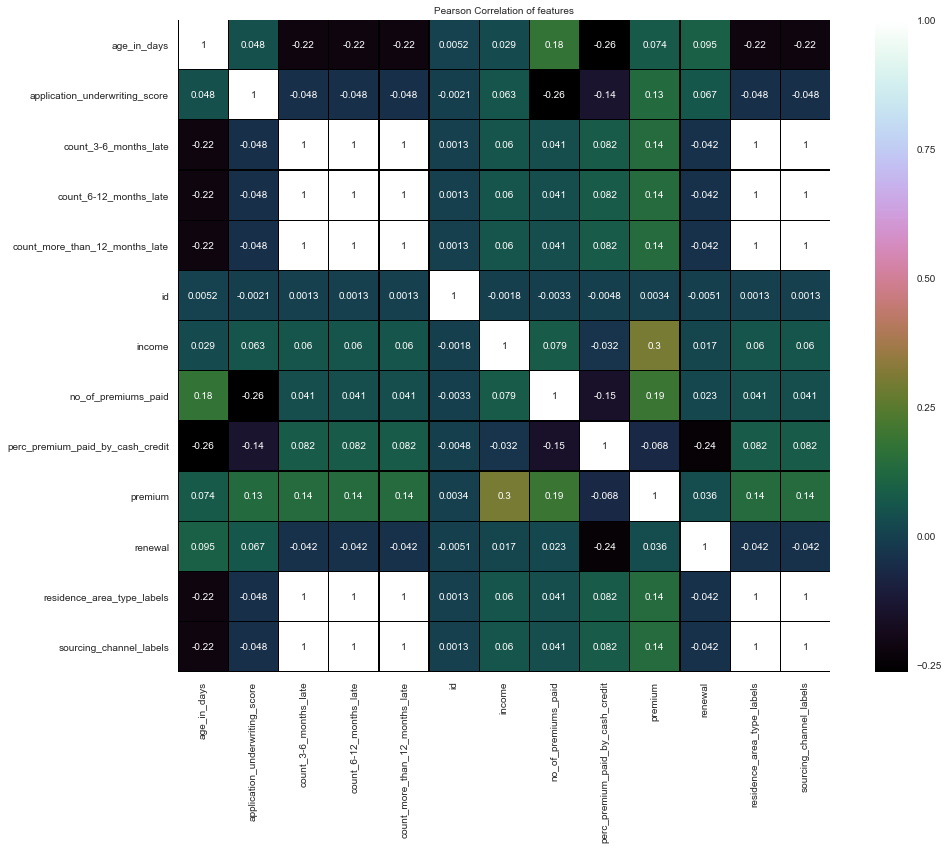

In [65]:
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in train.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = train.columns.difference(str_list) 
# Create Dataframe containing only numerical features
feat_num = train[num_list]
f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation of features')
# Draw the heatmap using seaborn
#sns.heatmap(house_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="PuBuGn", linecolor='k', annot=True)
sns.heatmap(feat_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="cubehelix", linecolor='k', annot=True)

In [66]:
# First extract the target variable which is our House prices


train_c = train

Y = train_c.renewal.values

# # Drop renewal from the train dataframe and create a matrix out of the train data
train_c = train_c.drop(['renewal'], axis=1)
X = train_c.as_matrix()
# Store the column/feature names into a list "colnames"
colnames = train_c.columns

In [67]:
# Define dictionary to store our rankings
ranks = {}
# Create our function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [68]:


# Finally let's run our Selection Stability method with Randomized Lasso
rlasso = RandomizedLasso(alpha=0.04)
rlasso.fit(X, Y)
ranks["rlasso/Stability"] = ranking(np.abs(rlasso.scores_), colnames)
print('finished')

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class RandomizedLasso is deprecated; The class RandomizedLasso is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


finished


In [69]:
# Construct our Linear Regression model
lr = LinearRegression(normalize=True)
lr.fit(X,Y)
#stop the search when only the last feature is left
rfe = RFE(lr, n_features_to_select=1, verbose =3 )
rfe.fit(X,Y)
ranks["RFE"] = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)

Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.


In [70]:
# Using Linear Regression
lr = LinearRegression(normalize=True)
lr.fit(X,Y)
ranks["LinReg"] = ranking(np.abs(lr.coef_), colnames)

# Using Ridge 
ridge = Ridge(alpha = 7)
ridge.fit(X,Y)
ranks['Ridge'] = ranking(np.abs(ridge.coef_), colnames)

# Using Lasso
lasso = Lasso(alpha=.05)
lasso.fit(X, Y)
ranks["Lasso"] = ranking(np.abs(lasso.coef_), colnames)

In [71]:
rf = RandomForestRegressor(n_jobs=-1, n_estimators=50, verbose=3)
rf.fit(X,Y)
ranks["RF"] = ranking(rf.feature_importances_, colnames);

building tree 1 of 50building tree 2 of 50building tree 3 of 50building tree 4 of 50



building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    5.9s


building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   12.4s finished


In [72]:
# Create empty dictionary to store the mean value calculated from all the scores
r = {}
for name in colnames:
    r[name] = round(np.mean([ranks[method][name] 
                             for method in ranks.keys()]), 2)
 
methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")
 
print("\t%s" % "\t".join(methods))
for name in colnames:
    print("%s\t%s" % (name, "\t".join(map(str, 
                         [ranks[method][name] for method in methods]))))

	Lasso	LinReg	RF	RFE	Ridge	rlasso/Stability	Mean
count_3-6_months_late	0.0	0.65	0.0	0.91	0.02	0.0	0.26
count_6-12_months_late	0.0	0.67	0.0	0.36	0.02	0.0	0.18
count_more_than_12_months_late	0.0	0.67	0.01	0.45	0.02	0.0	0.19
income	0.0	0.0	0.98	0.09	0.0	0.0	0.18
age_in_days	0.0	0.0	0.9	0.73	0.14	0.0	0.3
application_underwriting_score	0.0	0.0	0.75	0.64	0.07	0.0	0.24
id	1.0	0.0	1.0	0.0	0.0	0.0	0.33
no_of_premiums_paid	0.0	0.0	0.42	0.27	0.06	0.0	0.12
perc_premium_paid_by_cash_credit	0.0	0.0	0.95	0.82	1.0	0.0	0.46
premium	0.0	0.0	0.33	0.18	0.05	0.0	0.09
sourcing_channel_labels	0.0	1.0	0.0	0.55	0.02	0.0	0.26
residence_area_type_labels	0.0	1.0	0.0	1.0	0.02	0.0	0.34


In [73]:
# Put the mean scores into a Pandas dataframe
meanplot = pd.DataFrame(list(r.items()), columns= ['Feature','Mean Ranking'])

# Sort the dataframe
meanplot = meanplot.sort_values('Mean Ranking', ascending=False)

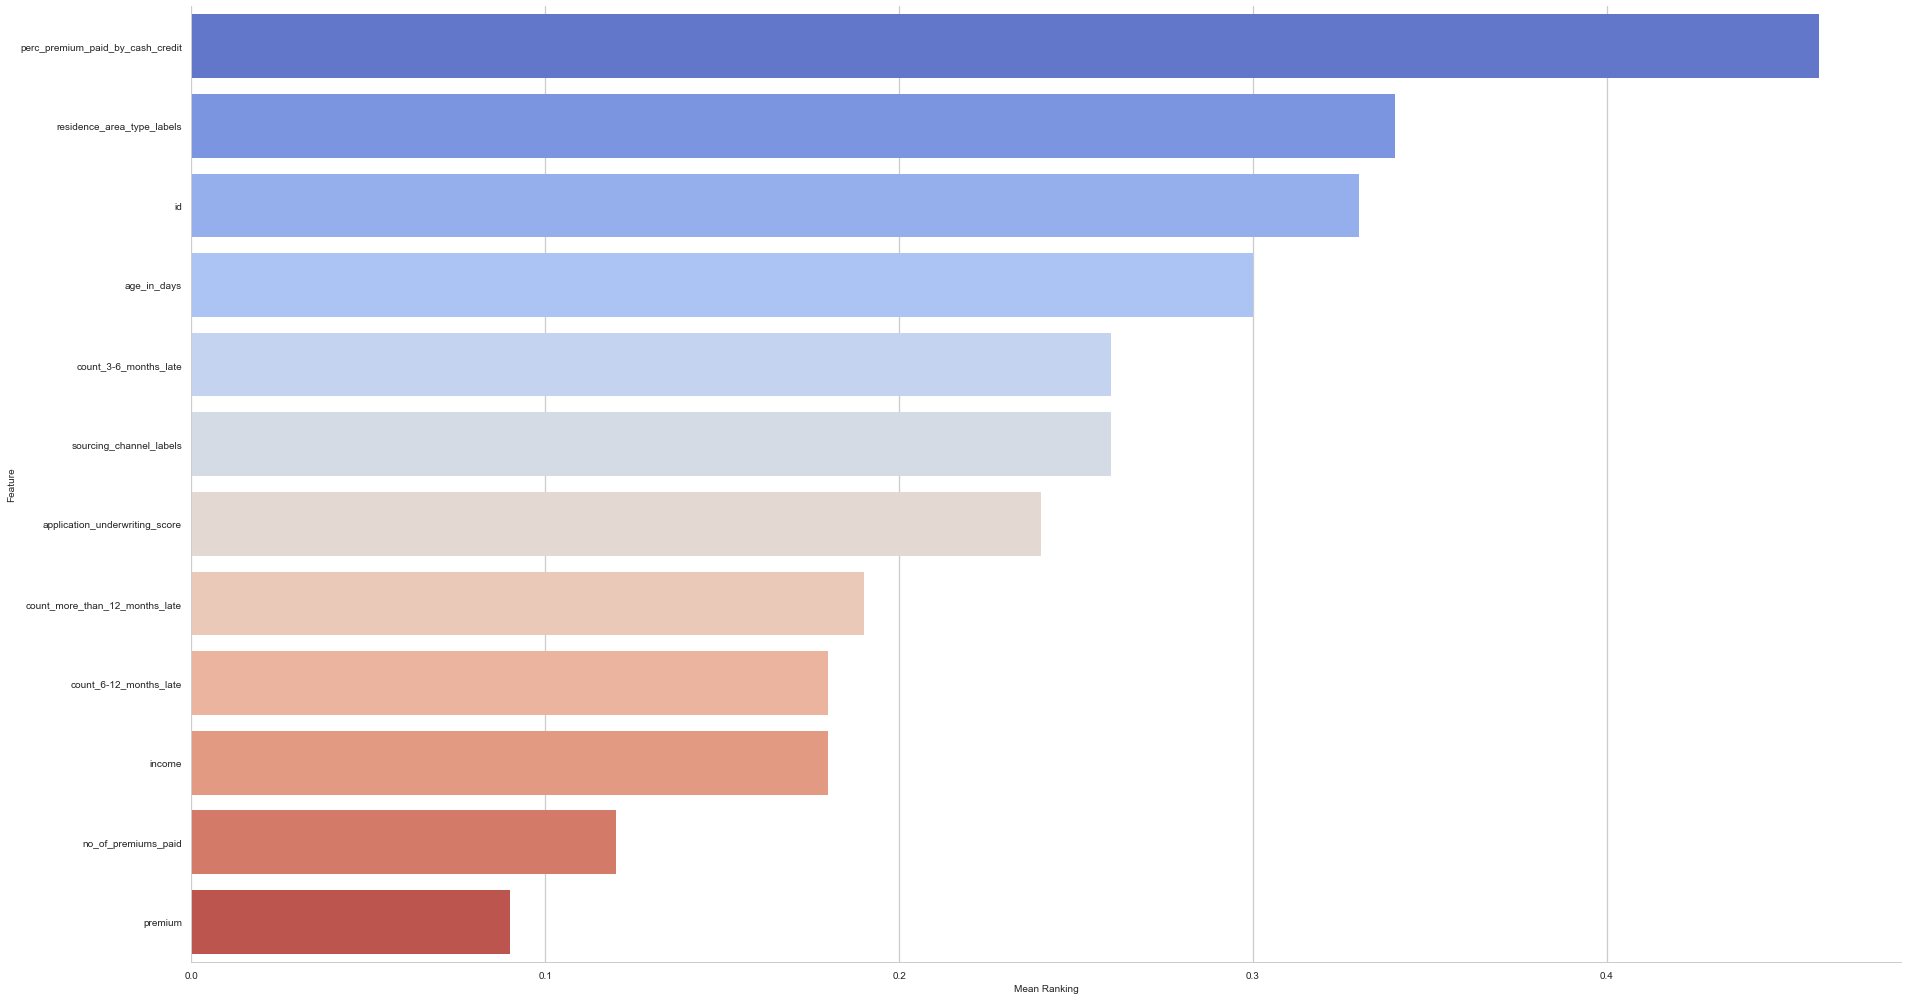

In [74]:
# Let's plot the ranking of the features
sns.factorplot(x="Mean Ranking", y="Feature", data = meanplot, kind="bar", 
               size=14, aspect=1.9, palette='coolwarm')

In [75]:
#Feature Selection

X = train[['count_3-6_months_late',
         'count_6-12_months_late','count_more_than_12_months_late','income','age_in_days','application_underwriting_score','id','no_of_premiums_paid','perc_premium_paid_by_cash_credit','premium','sourcing_channel_labels','residence_area_type_labels']]

y = train[['renewal']]
         
  
# bc_features = pd.DataFrame(bc_data.data, columns=bc_data.feature_names)
# bc_classes = pd.DataFrame(bc_data.target, columns=['IsMalignant'])

# # build featureset and response class labels 
# bc_X = np.array(bc_features)
# bc_y = np.array(bc_classes).T[0]
# print('Feature set shape:', bc_X.shape)
# print('Response class shape:', bc_y.shape)

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

lr = LogisticRegression()
rfe = RFE(estimator=lr, step=1)
rfe.fit(X, y)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
  n_features_to_select=None, step=1, verbose=0)

In [76]:
select_features_rfe = rfe.get_support()
#feature_names_rfe = train.columns[select_features_rfe]
# print(X.feature_names_rfe)

#print(select_features_rfe)
print("Features sorted by their rank:")
print(sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), X.columns)))

Features sorted by their rank:
[(1, 'count_more_than_12_months_late'), (1, 'id'), (1, 'income'), (1, 'premium'), (1, 'residence_area_type_labels'), (1, 'sourcing_channel_labels'), (2, 'count_6-12_months_late'), (3, 'count_3-6_months_late'), (4, 'age_in_days'), (5, 'no_of_premiums_paid'), (6, 'perc_premium_paid_by_cash_credit'), (7, 'application_underwriting_score')]


# Modeling and Tuning

In [77]:
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.base import clone
from sklearn.preprocessing import label_binarize
from scipy import interp
from sklearn.metrics import roc_curve, auc 


def get_metrics(true_labels, predicted_labels):
    
    print('Accuracy:', np.round(
                        metrics.accuracy_score(true_labels, 
                                               predicted_labels),
                        4))
    print('Precision:', np.round(
                        metrics.precision_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('Recall:', np.round(
                        metrics.recall_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('F1 Score:', np.round(
                        metrics.f1_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
                        

def train_predict_model(classifier, 
                        train_features, train_labels, 
                        test_features, test_labels):
    # build model    
    classifier.fit(train_features, train_labels)
    # predict using model
    predictions = classifier.predict(test_features) 
    return predictions    


def display_confusion_matrix(true_labels, predicted_labels, classes=[1,0]):
    
    total_classes = len(classes)
    level_labels = [total_classes*[0], list(range(total_classes))]

    cm = metrics.confusion_matrix(y_true=true_labels, y_pred=predicted_labels, 
                                  labels=classes)
    cm_frame = pd.DataFrame(data=cm, 
                            columns=pd.MultiIndex(levels=[['Predicted:'], classes], 
                                                  labels=level_labels), 
                            index=pd.MultiIndex(levels=[['Actual:'], classes], 
                                                labels=level_labels)) 
    print(cm_frame) 
    
def display_classification_report(true_labels, predicted_labels, classes=[1,0]):

    report = metrics.classification_report(y_true=true_labels, 
                                           y_pred=predicted_labels, 
                                           labels=classes) 
    print(report)
    
    
    
def display_model_performance_metrics(true_labels, predicted_labels, classes=[1,0]):
    print('Model Performance metrics:')
    print('-'*30)
    get_metrics(true_labels=true_labels, predicted_labels=predicted_labels)
    print('\nModel Classification report:')
    print('-'*30)
    display_classification_report(true_labels=true_labels, predicted_labels=predicted_labels, 
                                  classes=classes)
    print('\nPrediction Confusion Matrix:')
    print('-'*30)
    display_confusion_matrix(true_labels=true_labels, predicted_labels=predicted_labels, 
                             classes=classes)


def plot_model_decision_surface(clf, train_features, train_labels,
                                plot_step=0.02, cmap=plt.cm.RdYlBu,
                                markers=None, alphas=None, colors=None):
    
    if train_features.shape[1] != 2:
        raise ValueError("X_train should have exactly 2 columnns!")
    
    x_min, x_max = train_features[:, 0].min() - plot_step, train_features[:, 0].max() + plot_step
    y_min, y_max = train_features[:, 1].min() - plot_step, train_features[:, 1].max() + plot_step
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    clf_est = clone(clf)
    clf_est.fit(train_features,train_labels)
    if hasattr(clf_est, 'predict_proba'):
        Z = clf_est.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    else:
        Z = clf_est.predict(np.c_[xx.ravel(), yy.ravel()])    
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap)
    
    le = LabelEncoder()
    y_enc = le.fit_transform(train_labels)
    n_classes = len(le.classes_)
    plot_colors = ''.join(colors) if colors else [None] * n_classes
    label_names = le.classes_
    markers = markers if markers else [None] * n_classes
    alphas = alphas if alphas else [None] * n_classes
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y_enc == i)
        plt.scatter(train_features[idx, 0], train_features[idx, 1], c=color,
                    label=label_names[i], cmap=cmap, edgecolors='black', 
                    marker=markers[i], alpha=alphas[i])
    plt.legend()
    plt.show()


def plot_model_roc_curve(clf, features, true_labels, label_encoder=None, class_names=None):
    
    ## Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    if hasattr(clf, 'classes_'):
        class_labels = clf.classes_
    elif label_encoder:
        class_labels = label_encoder.classes_
    elif class_names:
        class_labels = class_names
    else:
        raise ValueError('Unable to derive prediction classes, please specify class_names!')
    n_classes = len(class_labels)
    y_test = label_binarize(true_labels, classes=class_labels)
    if n_classes == 2:
        if hasattr(clf, 'predict_proba'):
            prob = clf.predict_proba(features)
            y_score = prob[:, prob.shape[1]-1] 
        elif hasattr(clf, 'decision_function'):
            prob = clf.decision_function(features)
            y_score = prob[:, prob.shape[1]-1]
        else:
            raise AttributeError("Estimator doesn't have a probability or confidence scoring system!")
        
        fpr, tpr, _ = roc_curve(y_test, y_score)      
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label='ROC curve (area = {0:0.2f})'
                                 ''.format(roc_auc),
                 linewidth=2.5)
        
    elif n_classes > 2:
        if hasattr(clf, 'predict_proba'):
            y_score = clf.predict_proba(features)
        elif hasattr(clf, 'decision_function'):
            y_score = clf.decision_function(features)
        else:
            raise AttributeError("Estimator doesn't have a probability or confidence scoring system!")

        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        ## Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        ## Compute macro-average ROC curve and ROC area
        # First aggregate all false positive rates
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
        # Then interpolate all ROC curves at this points
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            mean_tpr += interp(all_fpr, fpr[i], tpr[i])
        # Finally average it and compute AUC
        mean_tpr /= n_classes
        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

        ## Plot ROC curves
        plt.figure(figsize=(6, 4))
        plt.plot(fpr["micro"], tpr["micro"],
                 label='micro-average ROC curve (area = {0:0.2f})'
                       ''.format(roc_auc["micro"]), linewidth=3)

        plt.plot(fpr["macro"], tpr["macro"],
                 label='macro-average ROC curve (area = {0:0.2f})'
                       ''.format(roc_auc["macro"]), linewidth=3)

        for i, label in enumerate(class_labels):
            plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                           ''.format(label, roc_auc[i]), 
                     linewidth=2, linestyle=':')
    else:
        raise ValueError('Number of classes should be atleast 2 or more')
        
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()




In [78]:

from sklearn.model_selection import train_test_split

outcome_var = 'renewal'
predictor_var = ['count_3-6_months_late','count_6-12_months_late','count_more_than_12_months_late','income','age_in_days','no_of_premiums_paid','perc_premium_paid_by_cash_credit','premium','sourcing_channel_labels','residence_area_type_labels']
X = train[predictor_var]
y = train[outcome_var] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape)

(55897, 10) (23956, 10)


In [79]:
from sklearn import linear_model

logistic = linear_model.LogisticRegression()
logistic.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [80]:
#Confusion Matrix

y_pred = logistic.predict(X_test)
display_confusion_matrix(true_labels=y_test, predicted_labels=y_pred, classes=[0, 1])

          Predicted:       
                   0      1
Actual: 0          0   1541
        1          0  22415


In [81]:
#True Positive, False Positive, True Negative and False Negative

positive_class = 1
TP = 22415
FP = 1541
TN = 0
FN = 0

In [82]:
#Accuracy

fw_acc = round(metrics.accuracy_score(y_true=y_test, y_pred=y_pred), 5)
mc_acc = round((TP + TN) / (TP + TN + FP + FN), 5)
print('Framework Accuracy:', fw_acc)
print('Manually Computed Accuracy:', mc_acc)

Framework Accuracy: 0.93567
Manually Computed Accuracy: 0.93567


In [83]:
#Precision

fw_prec = round(metrics.precision_score(y_true=y_test, y_pred=y_pred), 5)
mc_prec = round((TP) / (TP + FP), 5)
print('Framework Precision:', fw_prec)
print('Manually Computed Precision:', mc_prec)

Framework Precision: 0.93567
Manually Computed Precision: 0.93567


In [84]:
#Recall

fw_rec = round(metrics.recall_score(y_true=y_test, y_pred=y_pred), 5)
mc_rec = round((TP) / (TP + FN), 5)
print('Framework Recall:', fw_rec)
print('Manually Computed Recall:', mc_rec)

Framework Recall: 1.0
Manually Computed Recall: 1.0


In [85]:
#F1-Score

fw_f1 = round(metrics.f1_score(y_true=y_test, y_pred=y_pred), 5)
mc_f1 = round((2*mc_prec*mc_rec) / (mc_prec+mc_rec), 5)
print('Framework F1-Score:', fw_f1)
print('Manually Computed F1-Score:', mc_f1)

Framework F1-Score: 0.96677
Manually Computed F1-Score: 0.96677


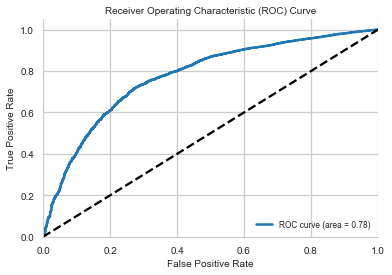

In [86]:
#ROC Curve and AUC

plot_model_roc_curve(clf=logistic, features=X_test, true_labels=y_test)

In [87]:
from sklearn.svm import SVC

# prepare datasets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# build default SVM model
def_svc = SVC(random_state=42)
def_svc.fit(X_train, y_train)

# predict and evaluate performance
def_y_pred = def_svc.predict(X_test)
print('Default Model Stats:')
display_model_performance_metrics(true_labels=y_test, predicted_labels=def_y_pred, classes=[0,1])

Default Model Stats:
Model Performance metrics:
------------------------------
Accuracy: 0.9357
Precision: 0.8755
Recall: 0.9357
F1 Score: 0.9046

Model Classification report:
------------------------------
             precision    recall  f1-score   support

          0       0.00      0.00      0.00      1541
          1       0.94      1.00      0.97     22415

avg / total       0.88      0.94      0.90     23956


Prediction Confusion Matrix:
------------------------------
          Predicted:       
                   0      1
Actual: 0          0   1541
        1          0  22415


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [88]:
#Tune Model with Grid Search
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# # setting the parameter grid
# grid_parameters = {'kernel': ['linear', 'rbf'], 
#                    'gamma': [1e-3, 1e-4],
#                    'C': [1, 10, 50, 100]}

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# perform hyperparameter tuning
print("# Tuning hyper-parameters for accuracy\n")
#clf = GridSearchCV(SVC(random_state=42), grid_parameters, cv=5, scoring='accuracy')

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
clf = GridSearchCV(logreg, param_grid, cv=5)

clf.fit(X_train, y_train)


# view accuracy scores for all the models
print("Grid scores for all the models based on CV:\n")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.5f (+/-%0.05f) for %r" % (mean, std * 2, params))
# check out best model performance
print("\nBest parameters set found on development set:", clf.best_params_)
print("Best model validation accuracy:", clf.best_score_)

# Tuning hyper-parameters for accuracy

Grid scores for all the models based on CV:

0.93815 (+/-0.00008) for {'C': 1e-05}
0.93815 (+/-0.00008) for {'C': 8.483428982440725e-05}
0.93815 (+/-0.00008) for {'C': 0.0007196856730011522}
0.93815 (+/-0.00008) for {'C': 0.006105402296585327}
0.93815 (+/-0.00008) for {'C': 0.05179474679231213}
0.93815 (+/-0.00008) for {'C': 0.4393970560760795}
0.93815 (+/-0.00008) for {'C': 3.727593720314938}
0.93815 (+/-0.00008) for {'C': 31.622776601683793}
0.93815 (+/-0.00008) for {'C': 268.2695795279727}
0.93815 (+/-0.00008) for {'C': 2275.845926074791}
0.93815 (+/-0.00008) for {'C': 19306.977288832535}
0.93815 (+/-0.00008) for {'C': 163789.3706954068}
0.93815 (+/-0.00008) for {'C': 1389495.494373136}
0.93815 (+/-0.00008) for {'C': 11787686.347935867}
0.93815 (+/-0.00008) for {'C': 100000000.0}

Best parameters set found on development set: {'C': 1e-05}
Best model validation accuracy: 0.93815410487146


In [90]:
#Evaluate Grid Search Tuned Model

gs_best = clf.best_estimator_
tuned_y_pred = gs_best.predict(X_test)

print('\n\nTuned Model Stats:')
display_model_performance_metrics(true_labels=y_test, predicted_labels=tuned_y_pred, classes=[0,1])



Tuned Model Stats:
Model Performance metrics:
------------------------------
Accuracy: 0.9357
Precision: 0.8755
Recall: 0.9357
F1 Score: 0.9046

Model Classification report:
------------------------------
             precision    recall  f1-score   support

          0       0.00      0.00      0.00      1541
          1       0.94      1.00      0.97     22415

avg / total       0.88      0.94      0.90     23956


Prediction Confusion Matrix:
------------------------------
          Predicted:       
                   0      1
Actual: 0          0   1541
        1          0  22415


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [117]:
# #Model Interpretation

# from skater.core.explanations import Interpretation
# from skater.model import InMemoryModel

# # train_target = np.ravel(np.array(train['renewal'].values))

# # # Extract features
# # float_columns=[]
# # cat_columns=[]
# # int_columns=[]
    
# # for i in train.columns:
# #     if train[i].dtype == 'float' : 
# #         float_columns.append(i)
# #     elif train[i].dtype == 'int64':
# #         int_columns.append(i)
# #     elif train[i].dtype == 'object':
# #         cat_columns.append(i)
          
# # train_cat_features = train[cat_columns]
# # train_float_features = train[float_columns]
# # train_int_features = train[int_columns]



# # #### Finalize X & Y
# # temp_1 = np.concatenate((train_cat_features,train_float_features),axis=1)
# # train_transformed_features = np.concatenate((temp_1,train_int_features),axis=1)
# # train_transformed_features = pd.DataFrame(data=train_transformed_features)

# # array = train_transformed_features.values
# # number_of_features = len(array[0])
# # X = array[:,0:number_of_features]
# # Y = train_target

# interpreter = Interpretation(X_test, feature_names=X_test.data.feature_names)
# model = InMemoryModel(logistic.predict_proba, examples=X_train, target_names=logistic.classes_)

In [119]:
# #Visualize Feature Importances

# plots = interpreter.feature_importance.plot_feature_importance(model, ascending=False)

In [120]:
#One-way partial dependence plot

# p = interpreter.partial_dependence.plot_partial_dependence(['worst area'], model, grid_resolution=50, 
#                                                            with_variance=True, figsize = (6, 4))

In [122]:
# #Explaining Predictions

# from skater.core.local_interpretation.lime.lime_tabular import LimeTabularExplainer
# exp = LimeTabularExplainer(X_train, feature_names=data.feature_names, 
#                            discretize_continuous=True, class_names=['0', '1'])

In [124]:
#exp.explain_instance(X_test[0], logistic.predict_proba).show_in_notebook()

In [125]:
#exp.explain_instance(X_test[1], logistic.predict_proba).show_in_notebook()

In [126]:
from sklearn.ensemble import RandomForestClassifier

# prepare datasets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# build default SVM model
def_RandClf = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
def_RandClf.fit(X_train, y_train)

# predict and evaluate performance
def_y_pred = def_RandClf.predict(X_test)
print('Default Model Stats:')
display_model_performance_metrics(true_labels=y_test, predicted_labels=def_y_pred, classes=[0,1])

Default Model Stats:
Model Performance metrics:
------------------------------
Accuracy: 0.9357
Precision: 0.8755
Recall: 0.9357
F1 Score: 0.9046

Model Classification report:
------------------------------
             precision    recall  f1-score   support

          0       0.00      0.00      0.00      1541
          1       0.94      1.00      0.97     22415

avg / total       0.88      0.94      0.90     23956


Prediction Confusion Matrix:
------------------------------
          Predicted:       
                   0      1
Actual: 0          0   1541
        1          0  22415


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [130]:
#Prediction
#Read Test File
test_df = pd.read_csv("test_modified.csv") 

#let us check the number of nulls / NaNs in the dataset

test_df.apply(lambda x: sum(x.isnull()),axis=0)

count_3-6_months_late               0
count_6-12_months_late              0
count_more_than_12_months_late      0
income                              0
age_in_days                         0
application_underwriting_score      0
id                                  0
no_of_premiums_paid                 0
perc_premium_paid_by_cash_credit    0
premium                             0
sourcing_channel_labels             0
residence_area_type_labels          0
dtype: int64

In [136]:
#Prediction

cols=test_df.columns

# predictor_var = train

# #test['renewal'] = model_rf2.predict(test[predictor_var])
# # df_test.loc[df_test.Loan_Status == 1 , 'Loan_Status' ] = 'Y'
# # df_test.loc[df_test.Loan_Status == 0 , 'Loan_Status' ] = 'N'

X_test = test_df[test_df.columns]

X_test.head()

# test_df['renewal'] = def_RandClf.predict(X_test)
# test_df

# # print('\n\nTuned Model Stats:')
# # display_model_performance_metrics(true_labels=y_test, predicted_labels=tuned_y_pred, classes=[0,1])

# #Submission

# pd.DataFrame(test_df, columns=['id' , 'renewal']).to_csv('prediction.csv')

,count_3-6_months_late,count_6-12_months_late,count_more_than_12_months_late,income,age_in_days,application_underwriting_score,id,no_of_premiums_paid,perc_premium_paid_by_cash_credit,premium,sourcing_channel_labels,residence_area_type_labels
0,0.0,0.0,0.0,-0.798446,1.143174,1.028986,649,-0.428571,-0.330693,-0.50,0.0,0.0
1,0.0,0.0,0.0,0.839107,0.666928,-0.362319,81136,1.285714,-0.087129,0.50,0.0,0.0
2,0.5,0.5,0.5,0.145497,-0.189898,-0.159420,70762,-1.142857,1.647525,0.50,0.5,0.5
3,0.5,0.5,0.5,-0.291833,-0.333725,-0.260870,53935,0.142857,0.059406,-0.25,0.5,0.5
4,0.0,0.0,0.0,0.243404,-1.048551,-0.014493,15476,0.571429,-0.251485,0.25,0.0,0.0
